In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from statsmodels.formula.api import ols

In [2]:
df = np.load('C:/Users/hanah/Desktop/MBA/Python/Datasets/Right_DLB_p_1.npy')

In [3]:
d1 = df[:,3,0:2]
d2 = df[:,7,0:2]
d3 = df[:,11,0:2]
d1 = pd.DataFrame(d1)
d2 = pd.DataFrame(d2)
d3 = pd.DataFrame(d3)

In [4]:
d1 = d1.assign(category = "first")
d2 = d2.assign(category = "second")
d3 = d3.assign(category = "third")

In [5]:
d = pd.concat([d1,d2,d3])
d.columns = ['x', 'y','category']
d.set_index(['category'])

,x,y
category,,
first,0.346297,0.386045
first,0.338763,0.380003
first,0.332152,0.375851
first,0.330055,0.373630
first,0.328872,0.371878
...,...,...
third,0.366559,0.227478
third,0.351509,0.204169
third,0.336923,0.185256


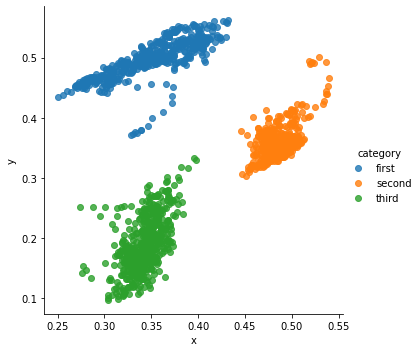

In [6]:
sns.lmplot(x="x", y="y", data=d, fit_reg=False, hue='category')

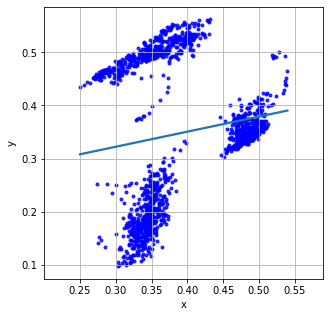

In [25]:
plt.rcParams["figure.figsize"] = (5,5)
sns.regplot(x="x", y="y", data=d, order=1, ci=None, scatter_kws={'color':'b', 's':9})
plt.xlim(d['x'].min()-0.05, d['x'].max()+0.05)
plt.grid()
plt.show()

In [11]:
z=np.polyfit(d['x'], d['y'], 1) # 기울기와 절편 확인
f=np.poly1d(z) # f(x): f함수에 x값을 넣으면 y값을 계산해 줌
print(z[0], z[1])
print(f(1))

0.2842564217441723 0.23688540100226807
0.5211418227464404


In [12]:
#statsmodel을 통해 회귀식의 회귀계수(기울기, 절편) 확인
ols('y~ x', data=d).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     36.47
Date:                Sat, 13 Aug 2022   Prob (F-statistic):           1.95e-09
Time:                        10:40:35   Log-Likelihood:                 943.70
No. Observations:                1500   AIC:                            -1883.
Df Residuals:                    1498   BIC:                            -1873.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2369      0.019     12.597      0.000       0.200       0.274
x              0.2843      0.047      6.039      0.000       0.192       0.377
==============================================================================
Omnibus:                     5098.010   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.479
Skew:                           0.119   Prob(JB):                     6.20e-25
Kurtosis:                       1.686   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""